In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

In [3]:
def sigmoid(LinearModel):
    return 1./(1+np.exp(-LinearModel))

In [29]:
def Predict(bias, W, X):
    y_pred = sigmoid(bias + np.dot(X,W))
    return y_pred,np.array([1 if y_predicted >0.5 else 0 for y_predicted in y_pred])

In [30]:
def compute_loss(y, y_propa):
    cross_entropy = y*np.log(y_propa) +(1-y)*np.log(1-y_propa)
    cost = -np.sum(cross_entropy)/float(len(y_propa))
    return cost

In [31]:
def gradientDescent(X,y):
    n_samples,n_features=X.shape
    learning_rate=0.0001
    n_iterations=500
    bias=0
    W=np.zeros(n_features) #ligne 6
    loss, accuracy, precision, recall, f1 = ([] for i in range(5))

    for _ in range(n_iterations):
        y_propa, y_predicted=Predict(bias, W, X) #ligne 8
        loss.append(compute_loss(y, y_propa))
        accuracy.append(accuracy_score(y,y_predicted))
        precision.append(precision_score(y,y_predicted))
        recall.append(recall_score(y,y_predicted))
        f1.append(f1_score(y,y_predicted))
        dW=(1/n_samples)*np.dot(X.T,(y_propa-y)) #ligne 9
        dbias=(1/n_samples)*np.sum(y_propa-y) #ligne 10
        W-= learning_rate *dW #ligne 11
        bias-= learning_rate *dbias #ligne 12
    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20, 10))
    ax1.set_xlabel('Iteration' , fontsize = 12)
    ax1.set_ylabel('Loss' , fontsize = 12)
    ax1.set_title ('Iterations VS Loss',fontsize = 14)
    ax1.plot(range(n_iterations),loss,label='cost')
    ax2.set_xlabel('Iteration' , fontsize = 12)
    ax2.set_title ('Iterations VS Accuracy VS Recall VS Precision VS F1',fontsize = 14)
    sns.lineplot(range(n_iterations),accuracy,label='accuracy')
    sns.lineplot(range(n_iterations),precision,label='precision')
    sns.lineplot(range(n_iterations),recall,label='recall')
    sns.lineplot(range(n_iterations),f1,label='f1')
    plt.show()
    return bias,W

In [32]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [33]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [34]:
X = df[['Glucose','BloodPressure','SkinThickness']]
y = df['Outcome']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

/home/hamza/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/hamza/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/hamza/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/hamza/anaconda3/lib/python3

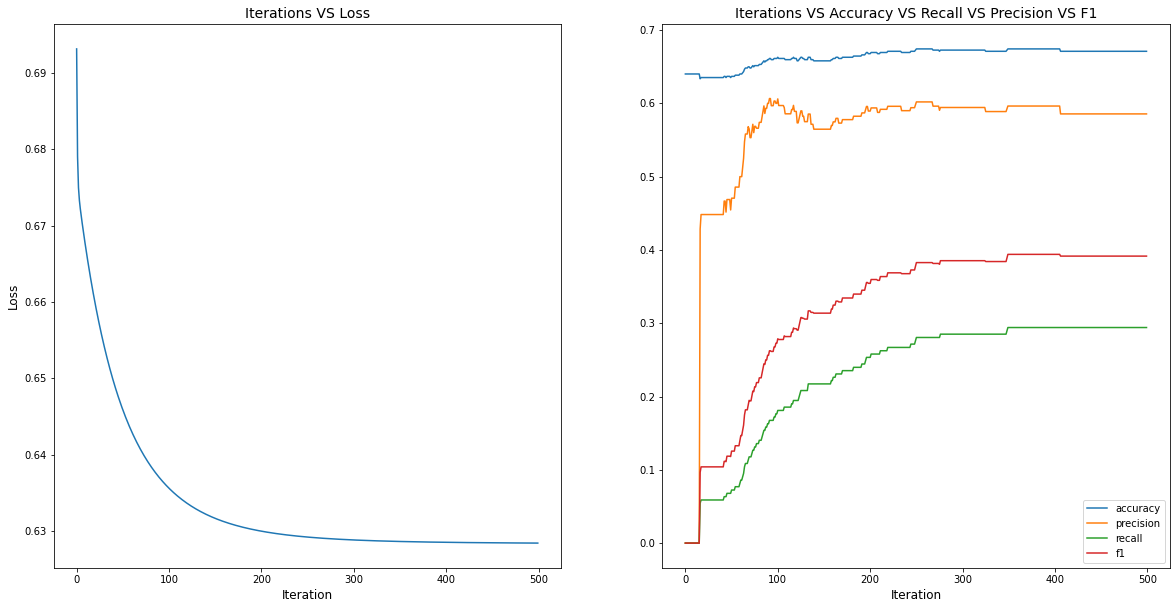

In [36]:
bias,W = gradientDescent(X_train,y_train)

In [38]:
y_propa,y_predicted = Predict(bias,W,X_test)
y_predicted

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [40]:
print('accuracy --> ',accuracy_score(y_test,y_predicted))
print('precision --> ',precision_score(y_test,y_predicted))
print('recall --> ',recall_score(y_test,y_predicted))
print('f1_score --> ',f1_score(y_test,y_predicted))

accuracy -->  0.7337662337662337
precision -->  0.6153846153846154
recall -->  0.3404255319148936
f1_score -->  0.4383561643835616


In [41]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train,y_train)
y_pred = lr.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [43]:
print('accuracy --> ',accuracy_score(y_test,lr.predict(X_test)))
print('precision --> ',precision_score(y_test,lr.predict(X_test)))
print('recall --> ',recall_score(y_test,lr.predict(X_test)))
print('f1_score --> ',f1_score(y_test,lr.predict(X_test)))

accuracy -->  0.7467532467532467
precision -->  0.6052631578947368
recall -->  0.48936170212765956
f1_score -->  0.5411764705882353
